<h1>Part Two</h1>

In [1]:
import numpy
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\twentyseventeen\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [27]:
class neuralNetwork:
    
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        self.lr = learningrate

        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        pass

    def train(self, inputs_list, targets_list):

        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        output_errors = targets - final_outputs
        hidden_errors = numpy.dot(self.who.T, output_errors)
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)),
        numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
        numpy.transpose(inputs))
        pass

    def query(self, inputs_list):
        inputs = numpy.array(inputs_list, ndmin=2).T
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        return final_outputs
    
    def backquery(self, targets_list):
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        final_inputs = self.inverse_activation_function(final_outputs)

        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        
        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

In [29]:
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate = 0.1

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

epochs = 5
for e in range(epochs):

    for record in training_data_list:

        all_values = record.split(',')

        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        targets = numpy.zeros(output_nodes) + 0.01

        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()


scorecard = []

for record in test_data_list:

    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)

    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9754


<h1>Part Three</h1>

In [30]:
import scipy.misc
img_array=scipy.misc.imread('Itsa2.png',flatten=True)
img_data=255-img_array.reshape(784)
img_data=(img_data/255.0*0.99)+0.01

C:\Users\twentyseventeen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [31]:
import imageio
import glob
import numpy
import matplotlib.pyplot
%matplotlib inline
our_own_dataset = []

In [32]:
for image_file_name in glob.glob("Itsa2.png"):
    print("loading ... ",image_file_name)
    label=int(image_file_name[-5:-4])
    img_array=imageio.imread(image_file_name,as_gray=True)
    img_data=255.0-img_array.reshape(784)
    img_data=(img_data/255.0*0.99)+0.01
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    record=numpy.append(label,img_data)
    print(record)
    our_own_dataset.append(record)
    pass

loading ...  Itsa2.png
0.01
0.8757647
[2.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01388235 0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.

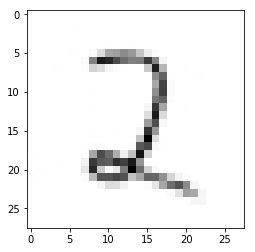

In [33]:
matplotlib.pyplot.imshow(our_own_dataset[0][1:].reshape(28,28),cmap='Greys',interpolation='None')

In [34]:
print(our_own_dataset[0])

[2.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01388235 0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

[[8.89539450e-04]
 [8.17040501e-03]
 [9.79254450e-01]
 [4.09762803e-03]
 [2.24927134e-04]
 [7.22742527e-02]
 [9.90262385e-04]
 [1.03645007e-03]
 [5.68311504e-06]
 [2.63420715e-03]]
network says 2


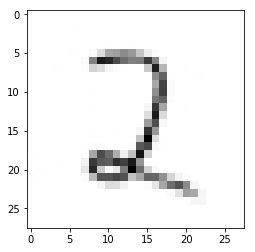

In [35]:
item = 0
matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28),cmap="Greys",interpolation="None")
correct_label=our_own_dataset[item][0]
inputs=our_own_dataset[item][1:]

outputs=n.query(inputs)
print(outputs)
label=numpy.argmax(outputs)
print("network says",label)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


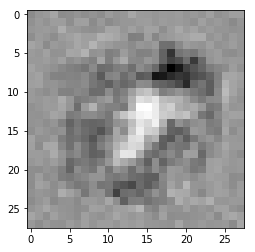

In [36]:
label = 0

targets = numpy.zeros(output_nodes) + 0.01

targets[label] = 0.99
print(targets)


image_data = n.backquery(targets)


matplotlib.pyplot.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')